In [6]:
import weave
proj_name = "CHATBOT-TLCN"
client = weave.init(proj_name)
evaluation_run_id = "019736c4-b55e-7d31-b8e5-fd2b2f20c8c7"

call = client.get_call(evaluation_run_id)

In [8]:
print(call)

WeaveObject(Call(_op_name='weave:///tlcn/CHATBOT-TLCN/op/Evaluation.evaluate:4zMa2z43pY0tRhlI5DsqqhuX4rGWBZSi6TtkLREfpTc', trace_id='019736c4-b55e-7d31-b8e5-fd176d677952', project_id='tlcn/CHATBOT-TLCN', parent_id=None, inputs={'self': ObjectRef(entity='tlcn', project='CHATBOT-TLCN', name='FAQ-Evaluation', _digest='R3xkHvqvBiKCK1l6bvmOuPYrMdN8SR5tOBEj73X6Mqg', _extra=()), 'model': OpRef(entity='tlcn', project='CHATBOT-TLCN', name='get_faq_test_case', _digest='Icap8UAtAksPYfL4D6dof3XtkRFYMNSH4gmUItqfZpI', _extra=())}, id='019736c4-b55e-7d31-b8e5-fd2b2f20c8c7', output={'evaluate_faq': {'ContextualPrecisionMetric': {'mean': 0.8295321637426901}, 'AnswerRelevancyMetric': {'mean': 0.8436846100236192}, 'FaithfulnessMetric': {'mean': 0.9537656641604011}}, 'model_latency': {'mean': 30.00909401617552}}, exception=None, summary={'usage': {'text-embedding-3-small': {'prompt_tokens': 16679, 'requests': 380, 'total_tokens': 16679}, 'gpt-4o-mini-2024-07-18': {'prompt_tokens': 343916, 'completion_toke

In [10]:
print(call.output)

WeaveDict({'evaluate_faq': {'ContextualPrecisionMetric': {'mean': 0.8295321637426901}, 'AnswerRelevancyMetric': {'mean': 0.8436846100236192}, 'FaithfulnessMetric': {'mean': 0.9537656641604011}}, 'model_latency': {'mean': 30.00909401617552}})


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

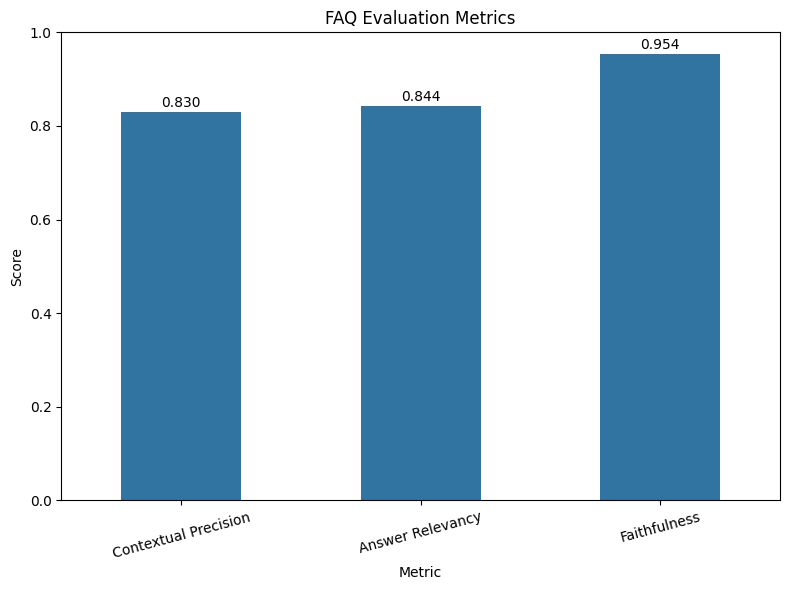


DataFrame:
                 Metric     Score
0  Contextual Precision  0.829532
1      Answer Relevancy  0.843685
2          Faithfulness  0.953766


In [22]:
metrics_data = call.output['evaluate_faq']
# Create a DataFrame
df = pd.DataFrame({
    'Metric': ['Contextual Precision', 'Answer Relevancy', 'Faithfulness'],
    'Score': [
        metrics_data['ContextualPrecisionMetric']['mean'],
        metrics_data['AnswerRelevancyMetric']['mean'],
        metrics_data['FaithfulnessMetric']['mean']
    ]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Metric', y='Score', width=0.5)
plt.title('FAQ Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 since scores are between 0 and 1
plt.xticks(rotation=15)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(df['Score']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Show the plot
plt.show()

# Print the DataFrame
print("\nDataFrame:")
print(df)